In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
from IPython import display

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create Data

In [4]:
nPerclust = 100
blur = 1

# Center of two class labels
# x any y corrdintates 
A = [1,1]    # class1
B = [5,1]    # class2

# Generate Data

a = [A[0] + np.random.randn(nPerclust)*blur , 
     A[1] + np.random.randn(nPerclust)*blur]

b = [B[0] + np.random.randn(nPerclust)*blur , 
     B[1] + np.random.randn(nPerclust)*blur]

# True Labels
labels_np = np.vstack((np.zeros((nPerclust,1)),
                      np.ones((nPerclust,1))
                      ))

# COncatenate into matrix
data_np = np.hstack((a,b)).T

# Convert to Pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

## 2. Plotting data

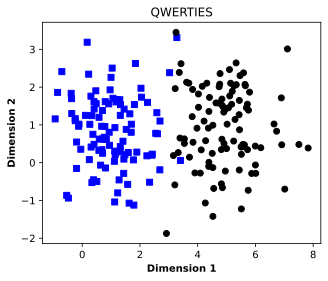

In [5]:
plt.figure(figsize = (5,4) , dpi = 130)

plt.plot(data[np.where(labels == 0)[0],0],
        data[np.where(labels == 0)[0],1],'bs')

plt.plot(data[np.where(labels == 1)[0],0],
        data[np.where(labels == 1)[0],1] , 'ko')

plt.title("QWERTIES")
plt.xlabel("Dimension 1" , fontweight = "bold")
plt.ylabel("Dimension 2" , fontweight = "bold")

plt.show()

## 3. Function to Build the Model

In [6]:
def createANNmodel(learningrate):
    
    # MOdel Architecture
    ANNclassify = nn.Sequential(
                            # Neuron 1
                            nn.Linear(2,1),
                            nn.ReLU(),
                            # Neuron 2
                            nn.Linear(1,1),
                            # nn.Sigmoid()
                           )
    # Loss Function
    lossfunc = nn.BCEWithLogitsLoss()
    
    # Optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learningrate)
    
    return ANNclassify,lossfunc,optimizer

In [7]:
ANNclassify , Lossfunc , Optimzer = createANNmodel(learningrate = 0.01)

In [8]:
Lossfunc

BCEWithLogitsLoss()

In [9]:
Optimzer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## 4. Function that trains the model

In [10]:
def trainthemodel(ANNmodel , lossfunc , optimizer , epochs ,data ):
    
    # Intialize the losses array
    losses = torch.zeros(epochs)

    for epoci in range(epochs):

        # Forward Propagation
        y_hat = ANNmodel(data)

        # Compute Losses
        loss = lossfunc(y_hat , labels)
        losses[epoci] = loss

        # Backpropagation
        optimizer.zero_grad()  # reinitialize
        loss.backward()
        optimizer.step()
        
        
    # Final Forward Pass
    predictions = ANNmodel(data)
    
    totalacc = 100*torch.mean( ( (predictions > 0) == labels ).float() )
    
    return losses ,predictions, totalacc

#### Testing

In [11]:
ANNclassify , Lossfunc , Optimzer = createANNmodel(learningrate = 0.01)

In [12]:
numepochs = 1000

losses , predictions , totalacc = trainthemodel(ANNmodel = ANNclassify,
                                                lossfunc = Lossfunc,
                                                optimizer = Optimzer,
                                                epochs = numepochs ,
                                                data = data )

#### Plotting

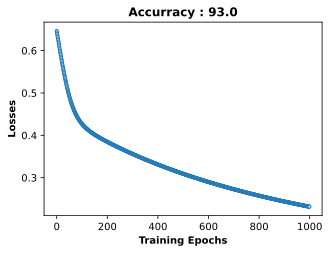

In [13]:
plt.figure(figsize = (5,3.5) , dpi = 140 )

plt.plot(losses.detach(), ".-" , markerfacecolor = "w" , linewidth = 0.1)

plt.xlabel("Training Epochs" , fontweight = "bold")
plt.ylabel("Losses" , fontweight = "bold")

plt.title(f"Accurracy : {totalacc}" , fontweight = "bold")

plt.show()

## 5. Parametric Experiment

In [14]:
numepochs = 1000
lrs = np.linspace(start = 0.001 , stop = 0.1, num = 40 )

Accbylr = []
allLosses = np.zeros((len(lrs) ,numepochs ))

# Loop through learning rate
for i,lr in enumerate(lrs):
    
    # Create and Run the Model
    ANNclassify , Lossfunc , Optimzer = createANNmodel(learningrate = lr)
    
    losses , predictions , totalacc = trainthemodel(ANNmodel = ANNclassify,
                                                    lossfunc = Lossfunc,
                                                    optimizer = Optimzer,
                                                    epochs = numepochs ,
                                                    data = data )
    
    # Store the Results
    Accbylr.append(totalacc)
    allLosses[i,:] = losses.detach()
    

In [15]:
allLosses

array([[0.83989197, 0.83979636, 0.83970076, ..., 0.77048784, 0.77043962,
        0.77039146],
       [0.79480833, 0.79429442, 0.79379636, ..., 0.70496047, 0.70493942,
        0.7049185 ],
       [0.70127845, 0.70125413, 0.70122999, ..., 0.69349653, 0.69349527,
        0.69349378],
       ...,
       [0.82135892, 0.71311408, 0.68500364, ..., 0.06228696, 0.06225352,
        0.06222018],
       [0.62201482, 0.58719534, 0.55362737, ..., 0.05801714, 0.0579921 ,
        0.05796714],
       [0.69427246, 0.69412881, 0.69399142, ..., 0.06423433, 0.06419445,
        0.06415471]])

In [16]:
allLosses.T

array([[0.83989197, 0.79480833, 0.70127845, ..., 0.82135892, 0.62201482,
        0.69427246],
       [0.83979636, 0.79429442, 0.70125413, ..., 0.71311408, 0.58719534,
        0.69412881],
       [0.83970076, 0.79379636, 0.70122999, ..., 0.68500364, 0.55362737,
        0.69399142],
       ...,
       [0.77048784, 0.70496047, 0.69349653, ..., 0.06228696, 0.05801714,
        0.06423433],
       [0.77043962, 0.70493942, 0.69349527, ..., 0.06225352, 0.0579921 ,
        0.06419445],
       [0.77039146, 0.7049185 , 0.69349378, ..., 0.06222018, 0.05796714,
        0.06415471]])

In [17]:
allLosses.shape

(40, 1000)

### Plotting

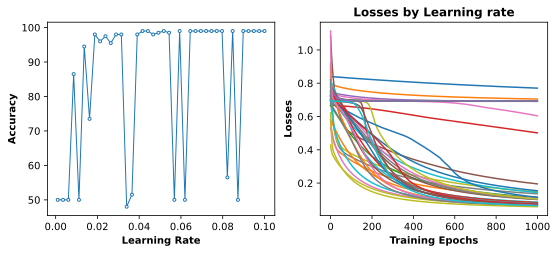

In [18]:
fig,ax = plt.subplots(nrows= 1 , ncols= 2 , figsize = (9,3.5) ,dpi = 130)


# Accuracy versus Learning rate Plot
ax[0].plot(lrs , Accbylr, ".-" , markerfacecolor = "w" , linewidth = 1)

ax[0].set_xlabel("Learning Rate" , fontweight = "bold")
ax[0].set_ylabel("Accuracy" , fontweight = "bold")


# Losses versus Training epochs with different learning rates
# column-wise plotting   
ax[1].plot(allLosses.T) 

ax[1].set_xlabel("Training Epochs" , fontweight = "bold")
ax[1].set_ylabel("Losses" , fontweight = "bold")

ax[1].set_title("Losses by Learning rate" ,fontweight = "bold")

plt.show()